In [3]:
# %load helper_data_generator.py

In [1]:
from PEA import PerformanceEnrichmentAnalysisClassifier
import helper_data_generator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelBinarizer, MultiLabelBinarizer, label_binarize
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, cohen_kappa_score, matthews_corrcoef, log_loss
from sklearn.datasets import make_blobs,make_moons,make_circles,make_classification
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
#from PerformanceEnrichmentAnalysis import PerformanceEnrichmentAnalysisClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.base import BaseEstimator, ClassifierMixin
import sklearn.cluster
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
from timeit import Timer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### PEA Data

In [187]:
df = pd.read_csv('../../data/pea_data_2018-08-28_cleaned.csv', sep=';', decimal=',')

X_full = df.loc[:, ['order_weight_aim',
                'width',
                'thickness',
                'piece_weight_aim',
                "productionsteps"]].reset_index(drop=True)
y_full = df.loc[:,'lateness']

borders = [-2880, 2880]

(y_full_encoded_values, Y_full_encoded_class_labels) =  helper_data_generator.encode_target_features_to_categorical(y_full, borders)

In [188]:
X_full = X_full[:1000]

In [189]:
y_full_encoded_values = y_full_encoded_values[:1000]

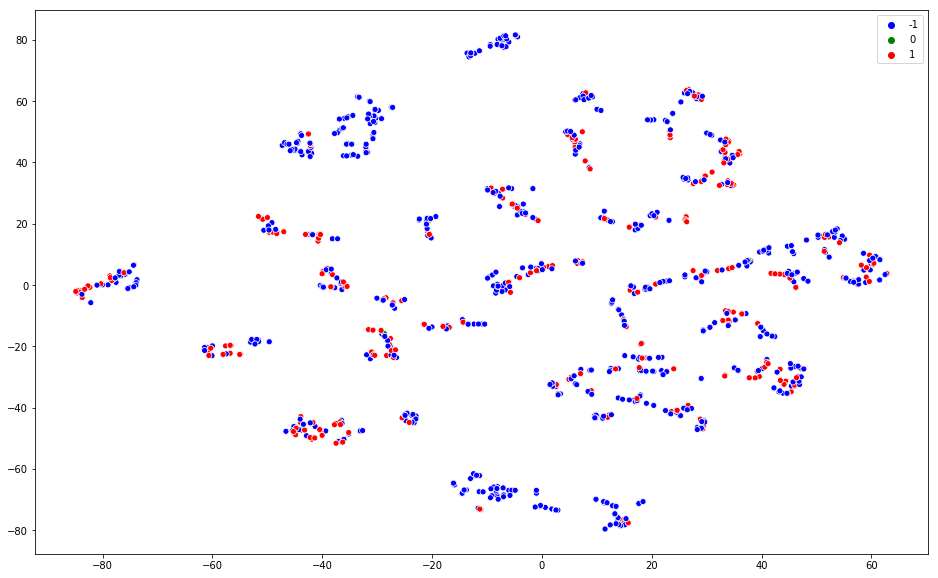

In [195]:
from sklearn.manifold import TSNE
sc = StandardScaler()
X_full = sc.fit_transform(X_full)
tsne = TSNE(n_components=2, perplexity=10)
tsne_obj= tsne.fit_transform(X_full)

plt.figure(figsize=(16,10))
sns.scatterplot(x= tsne_obj[:,0], y= tsne_obj[:,1], hue=np.array(y_full_encoded_values), palette=['b','g','r']);

In [130]:
# Proportion of labels

print('label 1: ',np.mean(y_full_encoded_values==1))
print('label 2: ',np.mean(y_full_encoded_values==-1))
print('label 3: ',np.mean(y_full_encoded_values==0))

label 1:  0.3474184433598767
label 2:  0.6501412792191112
label 3:  0.002440277421012073


### Selecting classifiers

In [4]:
classifier_list = [
     PerformanceEnrichmentAnalysisClassifier(
        number_of_clusters=20, permutations=100),
      KNeighborsClassifier(3),
     # SVC(kernel="linear", C=0.025)
     # SVC(gamma=2, C=1),
     # DecisionTreeClassifier(max_depth=5),
     # RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
     # MLPClassifier(alpha=0.01),
     # AdaBoostClassifier(),
     # GaussianNB(),
     # QuadraticDiscriminantAnalysis()
]


## --------------------------------------------------------------------------------------------------------
## PEA Sample Data
- pea_list_accuracies[ ] : list of accuracies corresponding to the number of iterations for PEA classifier
- ml_list_accuracies[ ] : list of accuracies corresponding to the number of iterations for ML classifier

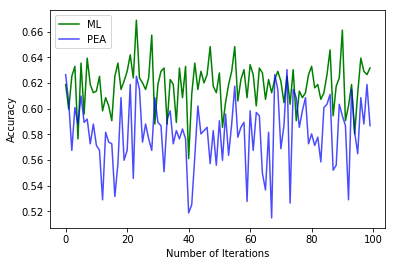

In [15]:
num_of_iterations = 100

pea_list_accuracies, ml_list_accuracies = helper_data_generator.get_list_accuracies_pea_data(num_of_iterations, 
                                                                                    X_full, 
                                                                                    y_full_encoded_values, 
                                                                                    classifier_list)

plt.plot(ml_list_accuracies,color='g',label='ML')
plt.plot(pea_list_accuracies,color='b',label='PEA', alpha = 0.7)
plt.ylabel('Accuracy')
plt.xlabel('Number of Iterations')
plt.legend(loc='best')

In [ ]:
#list_of_accuracies_for_ml = [clf.__class__.__name__+'_list_accuracies' for clf in classifier_list[1:]]
#list_of_accuracies_for_ml[0]
#str(list_of_accuracies_for_ml[0].split('_')[0])
#list_of_accuracies_for_ml[0] = []
#KNeighborsClassifier_list_accuracies

## --------------------------------------------------------------------------------------------------------
## Make Classification Data

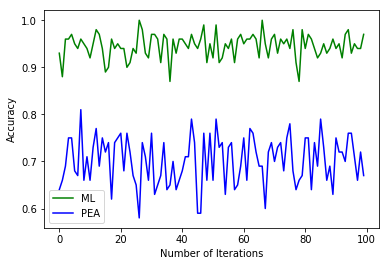

In [9]:
# Balanced Labels, no noise, medium complexity
num_of_iterations = 100
number_of_samples = 1000
number_of_features = 100
number_informative_features = 90
number_redundant_features = 10
number_repeated_features = 0
number_classes = 3
number_clusters_per_class = 1
class_separator = 0.3
flip_y = 0
weights = [0.5, 0.5, 0.5]


pea_list_accuracies, ml_list_accuracies = helper_data_generator.get_list_accuracies_classification_data(
                                                      num_of_iterations, 
                                                      classifier_list,
                                                      number_of_samples,
                                                      number_of_features,
                                                      number_informative_features,
                                                      number_redundant_features,
                                                      number_repeated_features,
                                                      number_classes,
                                                      number_clusters_per_class,
                                                      class_separator,
                                                      flip_y,
                                                      weights)

plt.plot(ml_list_accuracies,color='g',label='ML')
plt.plot(pea_list_accuracies,color='b',label='PEA')
plt.ylabel('Accuracy')
plt.xlabel('Number of Iterations')
plt.legend(loc='best')

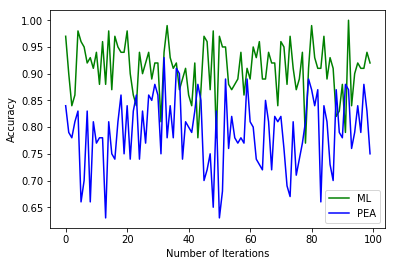

In [11]:
# Unbalanced Labels, no noise, medium complexity
num_of_iterations = 100
number_of_samples = 1000
number_of_features = 26
number_informative_features = 5
number_redundant_features = 21
number_repeated_features = 0
number_classes = 3
number_clusters_per_class = 1
class_separator = 0.3
flip_y = 0
weights = [0.7, 0.6, 0.3]

pea_list_accuracies, ml_list_accuracies = helper_data_generator.get_list_accuracies_classification_data(
                                                      num_of_iterations, 
                                                      classifier_list,
                                                      number_of_samples,
                                                      number_of_features,
                                                      number_informative_features,
                                                      number_redundant_features,
                                                      number_repeated_features,
                                                      number_classes,
                                                      number_clusters_per_class,
                                                      class_separator,
                                                      flip_y,
                                                      weights)


plt.plot(ml_list_accuracies,color='g',label='ML')
plt.plot(pea_list_accuracies,color='b',label='PEA')
plt.ylabel('Accuracy')
plt.xlabel('Number of Iterations')
plt.legend(loc='best')

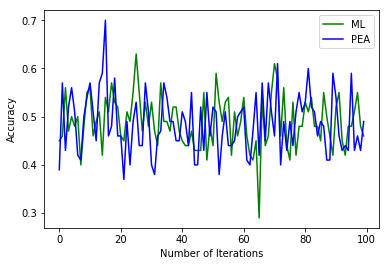

In [12]:
# Unbalanced Labels, medium noise, medium complexity 
num_of_iterations = 100
number_of_samples = 1000
number_of_features = 26
number_informative_features = 5
number_redundant_features = 21
number_repeated_features = 0
number_classes = 3
number_clusters_per_class = 1
class_separator = 0.3
flip_y = 0.5
weights = [0.3, 0.6, 0.7]

pea_list_accuracies, ml_list_accuracies = helper_data_generator.get_list_accuracies_classification_data(
                                                      num_of_iterations, 
                                                      classifier_list,
                                                      number_of_samples,
                                                      number_of_features,
                                                      number_informative_features,
                                                      number_redundant_features,
                                                      number_repeated_features,
                                                      number_classes,
                                                      number_clusters_per_class,
                                                      class_separator,
                                                      flip_y,
                                                      weights)

plt.plot(ml_list_accuracies,color='g',label='ML')
plt.plot(pea_list_accuracies,color='b',label='PEA')
plt.ylabel('Accuracy')
plt.xlabel('Number of Iterations')
plt.legend(loc='best')

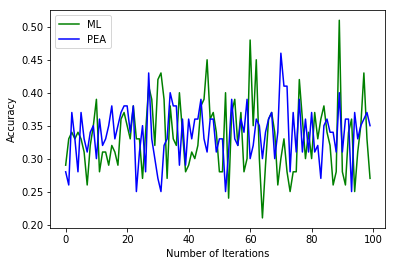

In [16]:
# Unbalanced Labels, high noise, high complexity 
num_of_iterations = 100
number_of_samples = 1000
number_of_features = 26
number_informative_features = 5
number_redundant_features = 21
number_repeated_features = 0
number_classes = 3
number_clusters_per_class = 1
class_separator = 0.1
flip_y = 0.9
weights = [0.2, 0.1, 0.7]

pea_list_accuracies, ml_list_accuracies = helper_data_generator.get_list_accuracies_classification_data(
                                                      num_of_iterations, 
                                                      classifier_list,
                                                      number_of_samples,
                                                      number_of_features,
                                                      number_informative_features,
                                                      number_redundant_features,
                                                      number_repeated_features,
                                                      number_classes,
                                                      number_clusters_per_class,
                                                      class_separator,
                                                      flip_y,
                                                      weights)

plt.plot(ml_list_accuracies,color='g',label='ML')
plt.plot(pea_list_accuracies,color='b',label='PEA')
plt.ylabel('Accuracy')
plt.xlabel('Number of Iterations')
plt.legend(loc='best')

## --------------------------------------------------------------------------------------------------------
##  Make Blob Data

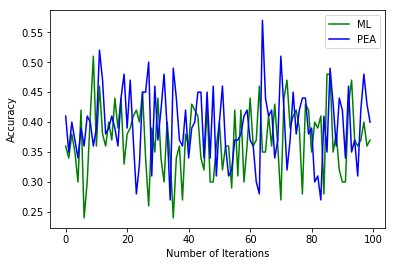

In [18]:
num_of_iterations = 100
number_of_samples = 1000
number_of_features = 26
number_of_clusters = 3
cluster_std_dev = 50

pea_list_accuracies, ml_list_accuracies = helper_data_generator.get_list_accuracies_blob_data(num_of_iterations, 
                                                   classifier_list,
                                                   number_of_samples,
                                                   number_of_features,
                                                   number_of_clusters,
                                                   cluster_std_dev)

plt.plot(ml_list_accuracies,color='g',label='ML')
plt.plot(pea_list_accuracies,color='b',label='PEA')
plt.ylabel('Accuracy')
plt.xlabel('Number of Iterations')
plt.legend(loc='best')

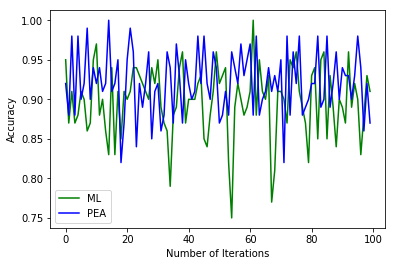

In [19]:
num_of_iterations = 100
number_of_samples = 1000
number_of_features = 26
number_of_clusters = 3
cluster_std_dev = 10

pea_list_accuracies, ml_list_accuracies = helper_data_generator.get_list_accuracies_blob_data(num_of_iterations, 
                                                   classifier_list,
                                                   number_of_samples,
                                                   number_of_features,
                                                   number_of_clusters,
                                                   cluster_std_dev)

plt.plot(ml_list_accuracies,color='g',label='ML')
plt.plot(pea_list_accuracies,color='b',label='PEA')
plt.ylabel('Accuracy')
plt.xlabel('Number of Iterations')
plt.legend(loc='best')

## --------------------------------------------------------------------------------------------------------
##  Visualizing change in accuracy wrt change is hyperparams

In [2]:
# Choose any list of classifiers

clf_list = [
     PerformanceEnrichmentAnalysisClassifier(
        number_of_clusters=20, permutations=100),
     KNeighborsClassifier(3),
     # SVC(kernel="linear", C=0.025),
      SVC(gamma=2, C=1),
     DecisionTreeClassifier(max_depth=5),
     # RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
     # MLPClassifier(alpha=0.01),
     AdaBoostClassifier(),
     #GaussianNB(),
     # QuadraticDiscriminantAnalysis()
]

- #### F1 score is usually not conidered for multiclass labels
- #### Priority
    - matthews_corrcoef > Auc roc > accuracy  > cohen kappa score for multiclass and imbalanced class
- #### type_param 
    - noise
    - class_sep
    - cluster_per_class
        -  n_classes * n_clusters_per_class must be smaller or equal 2 ** n_informative
        
- #### metric_classifier
    - accuracy
    - f1_score
    - precision
    - recall
    - roc_auc
    - cohen_kappa_score
    - matthews_corrcoef

In [65]:
def train_test_classifier_print_results(clf,
                                        list_accuracies,
                                        metric,
                                        X_train,
                                        X_test,
                                        y_train,
                                        y_test):
    
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
   
    if metric=='accuracy':
        correct_rate = accuracy_score(y_test, prediction)
    elif metric=='f1_score':
        # labels = np.unique(prediction) as we want the prediction for all the three labels [0,1,2]
        correct_rate = f1_score(y_test, prediction, average='weighted', labels=np.unique(prediction))
    elif metric=='precision':
        correct_rate = precision_score(y_test, prediction, average='weighted', labels=np.unique(prediction))
    elif metric=='recall':
        correct_rate = recall_score(y_test, prediction, average='weighted', labels=np.unique(prediction))
    elif metric=='cohen_kappa_score':
        correct_rate = cohen_kappa_score(y_test, prediction) 
    elif metric=='matthews_corrcoef':
        correct_rate = matthews_corrcoef(y_test, prediction) 
    elif metric=='roc_auc':

#         print(np.unique(y_test))
#         print(np.unique(prediction))
        y_test = label_binarize(y_test, classes=[0,1,2])
        prediction = label_binarize(prediction, classes=[0,1,2])
#         lb = LabelBinarizer()
#         lb.fit(y_test)
#         y_test = lb.transform(y_test)
#         prediction = lb.transform(prediction)
#         print(np.unique(y_test))
#         print(np.unique(prediction))
        correct_rate = roc_auc_score(y_test, prediction, average='samples')
        
    list_accuracies.append(correct_rate)
    
    return list_accuracies
    #return correct_rate


def make_classifier_data_accuracies(classifier_list, metric, class_sep=None, noise=None, cluster_per_class=None):
    default_class_separator = 0
    default_noise = 0
    def_cluster_per_class = 1
    
    if class_sep is None:
        class_separator = default_class_separator
    else:
        class_separator = class_sep

    if noise is None:
        flip_y = default_noise
    else:
        flip_y = noise
        
    if cluster_per_class is None:
        number_clusters_per_class = def_cluster_per_class
    else:
        number_clusters_per_class = cluster_per_class
    
    # Default Feature arguments
    number_of_samples = 1000
    number_of_features = 27
    number_informative_features = 6
    number_redundant_features = 21
    number_repeated_features = 0
    number_classes = 3
    #number_clusters_per_class = 1

    # according to the PEA dataset
    weights = [0.64, 0.34, 0.02]

    X_train, X_test, y_train, y_test = helper_data_generator.get_make_classification_data(
                                                number_of_samples,
                                                number_of_features,
                                                number_informative_features,
                                                number_redundant_features,
                                                number_repeated_features,
                                                number_classes,
                                                number_clusters_per_class,
                                                class_separator,
                                                flip_y,
                                                weights)

    X_train, X_test = helper_data_generator.get_scaled_data(X_train, X_test)

    list_lists_clf_accuracies = []
    list_lists_clf = []
    
    # Create a list of lists of accuracies
    for i in range(len(classifier_list)):
        list_lists_clf.append('list'+str(i))
    
    # Instantiate each list
    for i in range(len(list_lists_clf)):
        list_lists_clf[i] = []
    
    for i in range(len(classifier_list)):
        if isinstance(classifier_list[i],PerformanceEnrichmentAnalysisClassifier):
            name = 'PEA'
            list_lists_clf_accuracies.append((name,train_test_classifier_print_results(classifier_list[i], list_lists_clf[i], metric, X_train, X_test, y_train, y_test)))
        else:
            list_lists_clf_accuracies.append((str(classifier_list[i]).split('(')[0],train_test_classifier_print_results(classifier_list[i], list_lists_clf[i], metric, X_train, X_test, y_train, y_test)))
        
    return list_lists_clf_accuracies


def plot(range_param, param, dict_items, type_param, size):
    
    plt.figure(figsize=size)
    
    for key, value in dict_items.items():
        if key=='PEA':
            plt.plot(range_param,value,'b--',label= str(key)+', Std Dev: '+str(np.round(np.std(value),2)))
        else:
            plt.plot(range_param,value,label= str(key)+', Std Dev: '+str(np.round(np.std(value),2)), alpha = 0.6)
    
    plt.xticks(ticks=range_param);
    plt.title( str(type_param)+ ' vs '+str(param))
    plt.xlabel(str(type_param) + '--->increasing')
    plt.ylabel(str(param))
    plt.legend(loc='best')


def plot_accuracies(clf_list, metric_classifier,start, end, step, type_param, size):
    
    list_values = list(np.round(np.arange(start, end, step),2))
    
    if type_param=='noise':
        list_accuracies = [make_classifier_data_accuracies(clf_list, 
                                                                    metric = metric_classifier,
                                                                    noise = level) 
                           for level in list_values]
    elif type_param=='class_sep':
        list_accuracies = [make_classifier_data_accuracies(clf_list, 
                                                                    metric = metric_classifier,
                                                                    class_sep = level) 
                           for level in list_values]
    elif type_param=='cluster_per_class':    
        list_accuracies = [make_classifier_data_accuracies(clf_list, 
                                                                    metric = metric_classifier,
                                                                    cluster_per_class = level) 
                           for level in list_values]
    
    # Dictionary of classifier and their accuracies
    dict_items= {}
    
    for i in range(np.array(list_accuracies).shape[1]):
        dict_items[np.unique(np.array(list_accuracies).T[0][i])[0]] = np.hstack((np.array(list_accuracies).T[1][i]))

    plot(list_values, metric_classifier, dict_items,type_param,size)

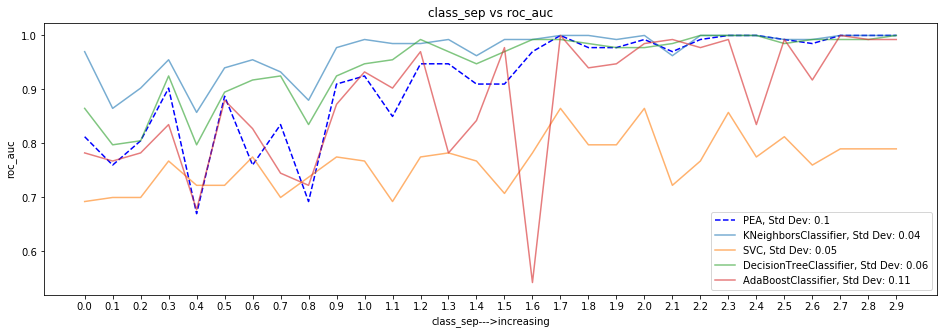

In [66]:
# cluster_per_class, start, end, step = 1, 10, 1

metric_classifier = 'roc_auc'
start, end, step = 0,3,0.1
type_param = 'class_sep'
size = (16,5)

plot_accuracies(clf_list, metric_classifier, start, end, step, type_param, size)

In [68]:
# label_binarize vs LabelBinarizer

y_test = [0,0,1,2,1,1,1,1,2,2,0]
#print(np.unique(y_test))
#print(y_test)
# y_test = label_binarize(y_test, classes=[0,1,2])
lb = LabelBinarizer()
lb.fit(y_test)
y_test = lb.transform(y_test)
#print(np.unique(y_test))
#print(y_test)

y_test = [0,0,1,2,1,1,1,1,2,2,0]
prediction = [0,1,1,2,2,1,2,1,2,1,0]
#print(list(np.unique(y_test)))
#print(np.unique(y_test))
print(y_test)
print(prediction)
y_test = label_binarize(y_test, classes=[0,1,2])
prediction = label_binarize(prediction, classes=[0,1,2])
#print(np.unique(y_test))
print(y_test)
print(prediction)
accuracy_score(y_test, prediction)

[0, 0, 1, 2, 1, 1, 1, 1, 2, 2, 0]
[0, 1, 1, 2, 2, 1, 2, 1, 2, 1, 0]
[[1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]]
[[1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]]


0.6363636363636364